## AI Review
## Topic: Tesla and Ferrari Stock Prediction
### Team:
 - Shashank Singh 21MIA1110 
 - Dazzle A J 21MIA1119

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
tesla = pd.read_csv('Tesla.csv')
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-10-22,14.104000,14.383333,13.960000,14.114667,14.114667,42378000
1,2015-10-23,14.333333,14.356667,13.846000,13.939333,13.939333,63532500
2,2015-10-26,14.092000,14.392000,14.000000,14.350667,14.350667,50871000
3,2015-10-27,14.322667,14.473333,13.834000,14.023333,14.023333,52791000
4,2015-10-28,14.087333,14.230000,13.886667,14.197333,14.197333,40929000


In [78]:
ferrari = pd.read_csv('Ferrari.csv')
ferrari.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-10-22,57.070000,58.200001,55.700001,56.750000,53.604126,4545100
1,2015-10-23,57.770000,58.000000,56.270000,56.380001,53.254635,1967600
2,2015-10-26,57.000000,57.000000,54.540001,55.020000,51.970028,1466300
3,2015-10-27,54.799999,54.990002,49.360001,53.849998,50.864880,5949200
4,2015-10-28,54.020000,54.160000,50.099998,51.869999,48.994644,2411300


In [79]:
num_rows, num_cols = tesla.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 1885
Number of columns: 7


In [80]:
num_rows, num_cols = ferrari.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 1885
Number of columns: 7


In [81]:
print(tesla.dtypes)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [82]:
print(ferrari.dtypes)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [83]:
print(tesla.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [84]:
print(ferrari.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [85]:
categorical_columns = tesla.select_dtypes(include='object').columns
for col in categorical_columns:
    unique_values = tesla[col].unique()
    print(f"Unique values in column '{col}': {unique_values}")

Unique values in column 'Date': ['2015-10-22' '2015-10-23' '2015-10-26' ... '2023-04-17' '2023-04-18'
 '2023-04-19']


In [86]:
numeric_columns = tesla.select_dtypes(include=['int', 'float']).columns
for col in numeric_columns:
    avg_value = tesla[col].mean()
    min_value = tesla[col].min()
    max_value = tesla[col].max()
    print(f"Column '{col}': Average= {avg_value}, Min= {min_value}, Max= {max_value}")

Column 'Open': Average= 100.0490486259946, Min= 9.488, Max= 411.470001
Column 'High': Average= 102.33008545835533, Min= 10.331333, Max= 414.496674
Column 'Low': Average= 97.54575595331565, Min= 9.403333, Max= 405.666656
Column 'Close': Average= 99.98930113103461, Min= 9.578, Max= 409.970001
Column 'Adj Close': Average= 99.98930113103461, Min= 9.578, Max= 409.970001
Column 'Volume': Average= 118181768.06366047, Min= 10620000, Max= 914082000


In [87]:
numeric_columns = ferrari.select_dtypes(include=['int', 'float']).columns
for col in numeric_columns:
    avg_value = ferrari[col].mean()
    min_value = ferrari[col].min()
    max_value = ferrari[col].max()
    print(f"Column '{col}': Average= {avg_value}, Min= {min_value}, Max= {max_value}")

Column 'Open': Average= 146.6949734297081, Min= 32.290001, Max= 284.940002
Column 'High': Average= 147.99039663925728, Min= 32.48, Max= 286.609985
Column 'Low': Average= 145.40620419204248, Min= 31.66, Max= 284.350006
Column 'Close': Average= 146.69697589814322, Min= 32.0, Max= 285.529999
Column 'Adj Close': Average= 144.38003195968173, Min= 30.226114, Max= 285.529999
Column 'Volume': Average= 485003.6074270557, Min= 53800, Max= 7485100


In [88]:
num_duplicates = tesla.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


In [89]:
num_duplicates = ferrari.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


In [90]:
correlation_matrix = tesla[numeric_columns].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999640  0.999487  0.998955   0.998955 -0.130931
High       0.999640  1.000000  0.999497  0.999528   0.999528 -0.125577
Low        0.999487  0.999497  1.000000  0.999578   0.999578 -0.136148
Close      0.998955  0.999528  0.999578  1.000000   1.000000 -0.129673
Adj Close  0.998955  0.999528  0.999578  1.000000   1.000000 -0.129673
Volume    -0.130931 -0.125577 -0.136148 -0.129673  -0.129673  1.000000


In [91]:
correlation_matrix = ferrari[numeric_columns].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999783  0.999764  0.999548   0.999426 -0.291441
High       0.999783  1.000000  0.999706  0.999781   0.999686 -0.287936
Low        0.999764  0.999706  1.000000  0.999808   0.999668 -0.298750
Close      0.999548  0.999781  0.999808  1.000000   0.999881 -0.294058
Adj Close  0.999426  0.999686  0.999668  0.999881   1.000000 -0.294159
Volume    -0.291441 -0.287936 -0.298750 -0.294058  -0.294159  1.000000


In [92]:
tesla['Year'] = pd.to_datetime(tesla['Date']).dt.year
average_price_per_year = tesla.groupby('Year')['Close'].mean()
print("Tesla average share price per year:")
print(average_price_per_year)

Tesla average share price per year:
Year
2015     14.910694
2016     13.984484
2017     20.954420
2018     21.153995
2019     18.235347
2020     96.665689
2021    259.998162
2022    263.093081
2023    176.328108
Name: Close, dtype: float64


In [93]:
ferrari['Year'] = pd.to_datetime(ferrari['Date']).dt.year
average_price_per_year = ferrari.groupby('Year')['Close'].mean()
print("Ferrari average share price per year:")
print(average_price_per_year)

Ferrari average share price per year:
Year
2015     49.474694
2016     46.020278
2017     91.249322
2018    124.199203
2019    147.236786
2020    178.309683
2021    218.776944
2022    206.874063
2023    258.806081
Name: Close, dtype: float64


In [94]:
tesla['Month'] = pd.to_datetime(tesla['Date']).dt.month
average_price_per_month = tesla.groupby('Month')['Close'].mean()
print("Tesla average price per month:")
print(average_price_per_month)

Tesla average price per month:
Month
1     105.003316
2     109.659089
3     105.313809
4     104.452530
5      81.433554
6      83.543694
7      91.177265
8     103.141966
9     109.648490
10     98.207217
11    102.374901
12    103.466480
Name: Close, dtype: float64


In [95]:
ferrari['Month'] = pd.to_datetime(ferrari['Date']).dt.month
average_price_per_month = ferrari.groupby('Month')['Close'].mean()
print("Ferrari average price per month:")
print(average_price_per_month)

Ferrari average price per month:
Month
1     149.508199
2     150.777385
3     148.198258
4     147.921987
5     135.882973
6     140.782800
7     147.360479
8     150.573057
9     149.956924
10    143.956124
11    146.352121
12    148.341071
Name: Close, dtype: float64


In [96]:
earliest_date = tesla['Date'].min()
latest_date = tesla['Date'].max()
print("Earliest date:", earliest_date)
print("Latest date:", latest_date)

Earliest date: 2015-10-22
Latest date: 2023-04-19


In [97]:
earliest_date = ferrari['Date'].min()
latest_date = ferrari['Date'].max()
print("Earliest date:", earliest_date)
print("Latest date:", latest_date)

Earliest date: 2015-10-22
Latest date: 2023-04-19


In [98]:
total_volume_per_year = tesla.groupby('Year')['Volume'].sum()
print("Total trading volume per year:")
print(total_volume_per_year)

Total trading volume per year:
Year
2015     2419168500
2016    17435425500
2017    23850471000
2018    32424582000
2019    34620726000
2020    57158737200
2021    20708071500
2022    21821019600
2023    12334431500
Name: Volume, dtype: int64


In [99]:
total_volume_per_year = ferrari.groupby('Year')['Volume'].sum()
print("Total trading volume per year:")
print(total_volume_per_year)

Total trading volume per year:
Year
2015     47745400
2016    173509400
2017    143317200
2018    157306800
2019     99901700
2020     86284800
2021     81671600
2022     97582000
2023     26912900
Name: Volume, dtype: int64


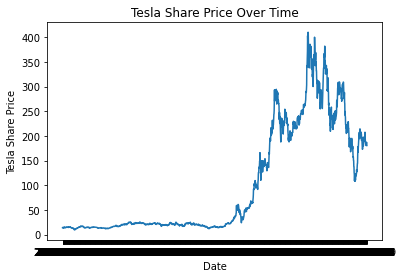

In [100]:
plt.plot(tesla['Date'], tesla['Close'])
plt.xlabel('Date')
plt.ylabel('Tesla Share Price')
plt.title('Tesla Share Price Over Time')
plt.show()

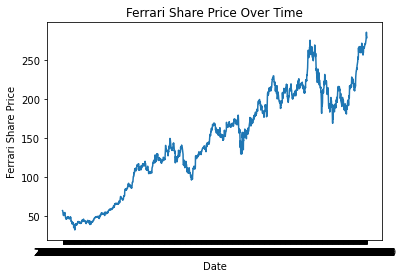

In [101]:
plt.plot(ferrari['Date'], ferrari['Close'])
plt.xlabel('Date')
plt.ylabel('Ferrari Share Price')
plt.title('Ferrari Share Price Over Time')
plt.show()

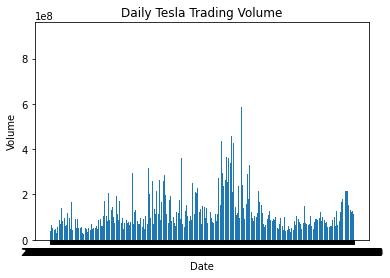

In [102]:
plt.bar(tesla['Date'], tesla['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Daily Tesla Trading Volume')
plt.show()

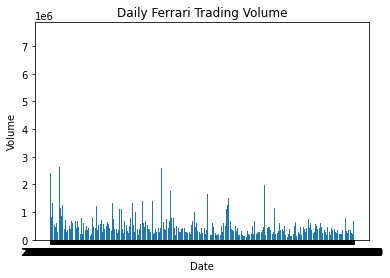

In [103]:
plt.bar(ferrari['Date'],ferrari['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Daily Ferrari Trading Volume')
plt.show()

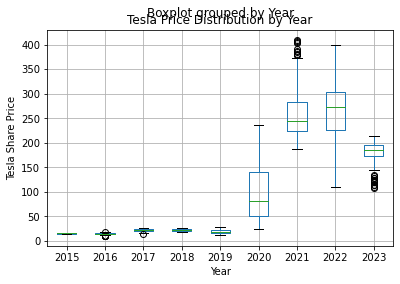

In [104]:
tesla['Year'] = pd.to_datetime(tesla['Date']).dt.year
tesla.boxplot(column='Close', by='Year')
plt.xlabel('Year')
plt.ylabel('Tesla Share Price')
plt.title('Tesla Price Distribution by Year')
plt.show()

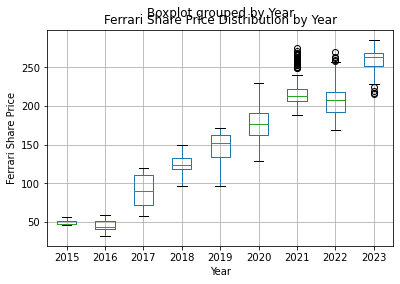

In [105]:
ferrari['Year'] = pd.to_datetime(ferrari['Date']).dt.year
ferrari.boxplot(column='Close', by='Year')
plt.xlabel('Year')
plt.ylabel('Ferrari Share Price')
plt.title('Ferrari Share Price Distribution by Year')
plt.show()

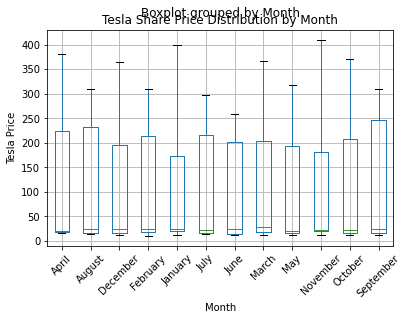

In [106]:
tesla['Month'] = pd.to_datetime(tesla['Date']).dt.month_name()
tesla.boxplot(column='Close', by='Month', rot=45)
plt.xlabel('Month')
plt.ylabel('Tesla Price')
plt.title('Tesla Share Price Distribution by Month')
plt.show()

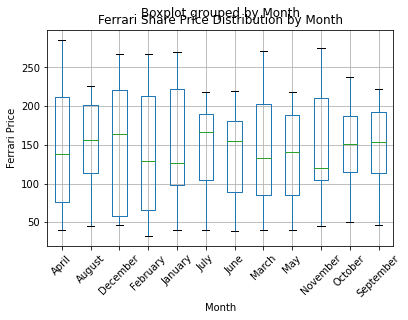

In [107]:
ferrari['Month'] = pd.to_datetime(ferrari['Date']).dt.month_name()
ferrari.boxplot(column='Close', by='Month', rot=45)
plt.xlabel('Month')
plt.ylabel('Ferrari Price')
plt.title('Ferrari Share Price Distribution by Month')
plt.show()

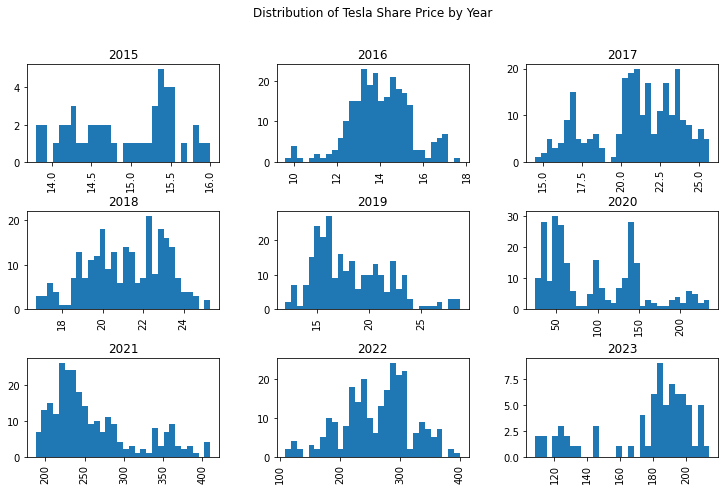

In [108]:
tesla['Year'] = pd.to_datetime(tesla['Date']).dt.year
tesla.hist(column='Close', by='Year', bins=30, layout=(4,3), figsize=(12, 10))
plt.xlabel('Tesla Share Price')
plt.ylabel('Frequency')
plt.suptitle('Distribution of Tesla Share Price by Year')
plt.show()

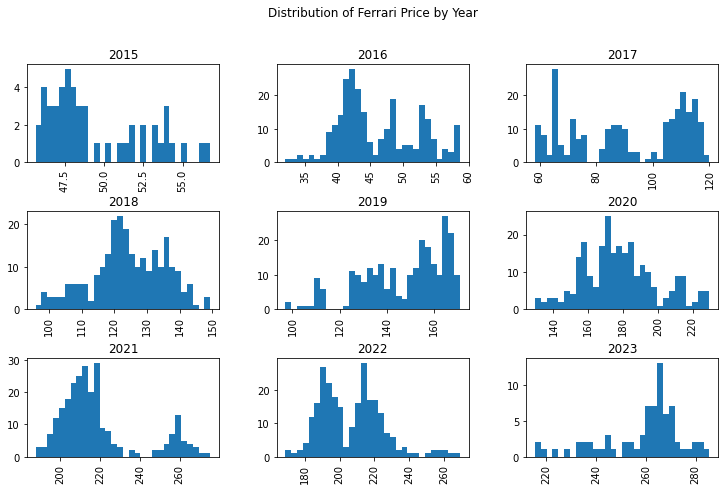

In [109]:
ferrari['Year'] = pd.to_datetime(ferrari['Date']).dt.year
ferrari.hist(column='Close', by='Year', bins=30, layout=(4,3), figsize=(12, 10))
plt.xlabel('Ferrari Share Price')
plt.ylabel('Frequency')
plt.suptitle('Distribution of Ferrari Price by Year')
plt.show()

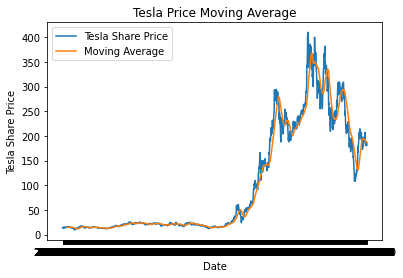

In [110]:
tesla['Moving Average'] = tesla['Close'].rolling(window=30).mean()
plt.plot(tesla['Date'], tesla['Close'], label='Tesla Share Price')
plt.plot(tesla['Date'], tesla['Moving Average'], label='Moving Average')
plt.xlabel('Date')
plt.ylabel('Tesla Share Price')
plt.title('Tesla Price Moving Average')
plt.legend()
plt.show()

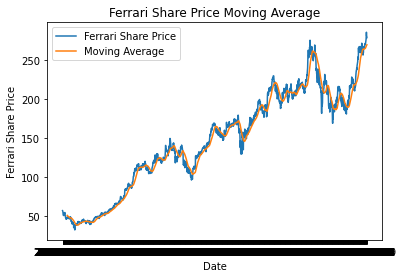

In [111]:
ferrari['Moving Average'] = ferrari['Close'].rolling(window=30).mean()
plt.plot(tesla['Date'], ferrari['Close'], label='Ferrari Share Price')
plt.plot(tesla['Date'], ferrari['Moving Average'], label='Moving Average')
plt.xlabel('Date')
plt.ylabel('Ferrari Share Price')
plt.title('Ferrari Share Price Moving Average')
plt.legend()
plt.show()

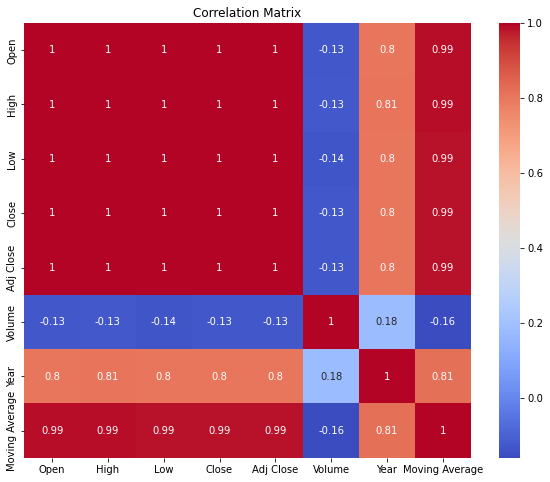

In [112]:
correlation_matrix = tesla.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

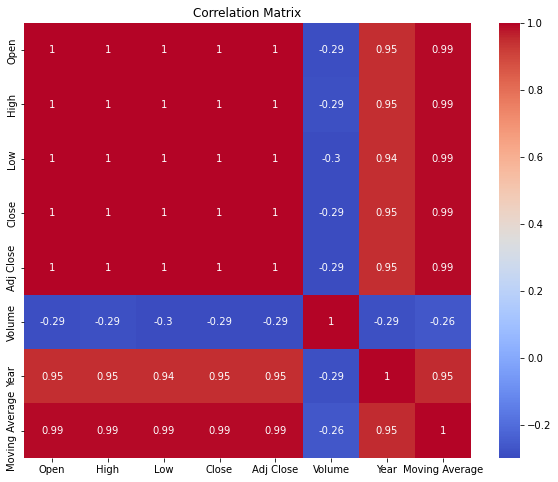

In [113]:
correlation_matrix = ferrari.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

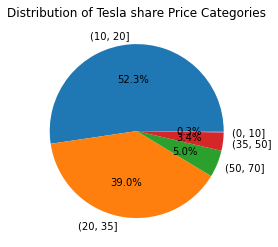

In [114]:
tesla['Category'] = pd.cut(tesla['Close'],bins=[0,10,20,35,50,70])
category_counts = tesla['Category'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Tesla share Price Categories')
plt.show()

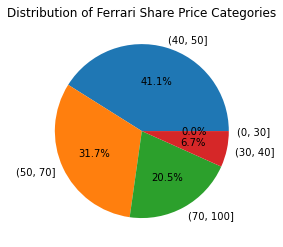

In [115]:
ferrari['Category'] = pd.cut(ferrari['Close'],bins=[0,30,40,50,70,100])
category_counts = ferrari['Category'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Ferrari Share Price Categories')
plt.show()

In [118]:
tesla['Date'] = pd.to_datetime(tesla['Date'])

In [119]:
ferrari['Date'] = pd.to_datetime(ferrari['Date'])

In [120]:
tesla['Year'] = tesla['Date'].dt.year
tesla['Month'] = tesla['Date'].dt.month
tesla['Day'] = tesla['Date'].dt.day

In [121]:
ferrari['Year'] = ferrari['Date'].dt.year
ferrari['Month'] = ferrari['Date'].dt.month
ferrari['Day'] = ferrari['Date'].dt.day

In [125]:
tesla['Close'] = (tesla['Close'] - tesla['Close'].min()) / (tesla['Close'].max() - tesla['Close'].min())

In [126]:
ferrari['Close'] = (ferrari['Close'] - ferrari['Close'].min()) / (ferrari['Close'].max() - ferrari['Close'].min())

     Feature  Importance
3  Adj Close    0.785072
2        Low    0.097258
1       High    0.075381
0       Open    0.042277
4     Volume    0.000012
['Adj Close', 'Low', 'High', 'Open', 'Volume']


<BarContainer object of 5 artists>

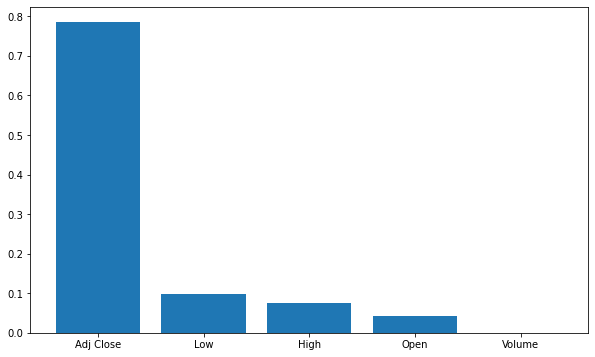

In [140]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
ferrari_data = pd.read_csv('Ferrari.csv')
X = ferrari_data.drop(['Date', 'Close'], axis=1)
y = ferrari_data['Close']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
rf = RandomForestRegressor()
rf.fit(X_scaled, y)
feature_importances = rf.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)
print(feature_importances_df)
selected_features = feature_importances_df['Feature'][:10].tolist()
print(selected_features)
plt.figure(figsize=(10, 6))
plt.bar(feature_importances_df['Feature'], feature_importances_df['Importance'])

     Feature  Importance
3  Adj Close    0.939014
1       High    0.040905
2        Low    0.015078
0       Open    0.004997
4     Volume    0.000006
['Adj Close', 'High', 'Low', 'Open', 'Volume']


<BarContainer object of 5 artists>

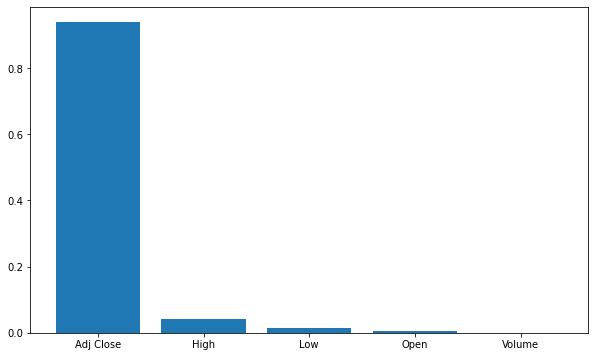

In [141]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
tesla_data = pd.read_csv('Tesla.csv')
X = tesla_data.drop(['Date', 'Close'], axis=1)
y = tesla_data['Close']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
rf = RandomForestRegressor()
rf.fit(X_scaled, y)
feature_importances = rf.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)
print(feature_importances_df)
selected_features = feature_importances_df['Feature'][:10].tolist()
print(selected_features)
plt.figure(figsize=(10, 6))
plt.bar(feature_importances_df['Feature'], feature_importances_df['Importance'])

Explained Variance Ratio: [1.00000000e+00 7.18070791e-12]


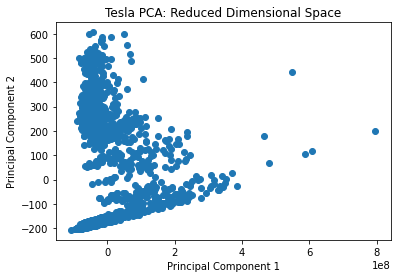

In [160]:
from sklearn.decomposition import PCA
import pandas as pd
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
tesla_data['Year'] = tesla_data['Date'].dt.year
tesla_data['Month'] = tesla_data['Date'].dt.month
tesla_data['Day'] = tesla_data['Date'].dt.day
X = tesla_data.drop(columns=['Close', 'Date'])
y = tesla_data['Close']
pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X)
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Tesla PCA: Reduced Dimensional Space')
plt.show()

Explained Variance Ratio: [9.99999931e-01 6.87349194e-08]


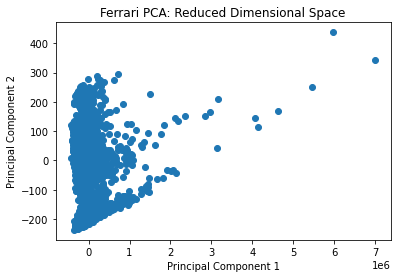

In [159]:
from sklearn.decomposition import PCA
import pandas as pd
ferrari_data['Date'] = pd.to_datetime(ferrari_data['Date'])
ferrari_data['Year'] = ferrari_data['Date'].dt.year
ferrari_data['Month'] = ferrari_data['Date'].dt.month
ferrari_data['Day'] = ferrari_data['Date'].dt.day
X = ferrari_data.drop(columns=['Close', 'Date'])
y = ferrari_data['Close']
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Ferrari PCA: Reduced Dimensional Space')
plt.show()

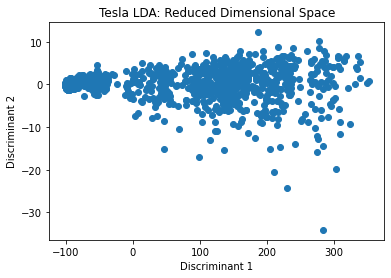

In [157]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
import pandas as pd
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
tesla_data['Year'] = tesla_data['Date'].dt.year
tesla_data['Month'] = tesla_data['Date'].dt.month
tesla_data['Day'] = tesla_data['Date'].dt.day
X = tesla_data.drop(columns=['Close', 'Date'])
y = tesla_data['Close']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
lda = LinearDiscriminantAnalysis(n_components=2)  
X_lda = lda.fit_transform(X, y)
plt.scatter(X_lda[:, 0], X_lda[:, 1])
plt.xlabel('Discriminant 1')
plt.ylabel('Discriminant 2')
plt.title('Tesla LDA: Reduced Dimensional Space')
plt.show()

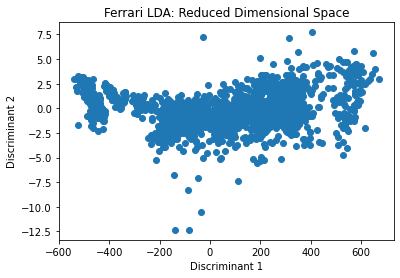

In [158]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
import pandas as pd
ferrari_data['Date'] = pd.to_datetime(ferrari_data['Date'])
ferrari_data['Year'] = ferrari_data['Date'].dt.year
ferrari_data['Month'] = ferrari_data['Date'].dt.month
ferrari_data['Day'] = ferrari_data['Date'].dt.day
X = ferrari_data.drop(columns=['Close', 'Date'])
y = ferrari_data['Close']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
lda = LinearDiscriminantAnalysis(n_components=2)  
X_lda = lda.fit_transform(X, y)
plt.scatter(X_lda[:, 0], X_lda[:, 1])
plt.xlabel('Discriminant 1')
plt.ylabel('Discriminant 2')
plt.title('Ferrari LDA: Reduced Dimensional Space')
plt.show()